In [2]:
from __future__ import print_function,division
%matplotlib inline
import matplotlib.pyplot as plt
import random 
import tensorflow as tf
import numpy as np

C:\Users\chaor\AppData\Local\Continuum\anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


## Basics Tensorflow

### I. Linear Regression

<b>1a. Creating Sample Data </b>

In [3]:
x = np.random.randn(100,3) # 100 data points of dimension 3
w = np.array([[1],[2],[3]])
b = 10
y = None # Write code to create the target. Use Numpy operations
#print(x)
#print(w)
y = np.matmul(x,w) + b

**1b. Plot Data**

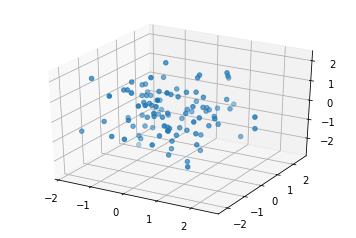

In [4]:
# Explore the data by plotting whatever makes you understand the problem better. 
# Your code here.
from mpl_toolkits import mplot3d
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(x[:, 0], x[:, 1],x[:, 2], 'o', label = 'x')
#x.scatter3D(y[:, 0], y[:, 1],y[:, 2], 'o', label = 'y')


<b>2. Creating Placeholders</b>

In [5]:
X = tf.placeholder(dtype=tf.float32,shape=[100,3]) 
Y_Expected = tf.placeholder(dtype=tf.float32,shape=[100,1])# Write code to create the placeholder for target.

<b>3. Creating Variables</b>

In [6]:
B = tf.Variable(dtype=tf.float32,initial_value=np.zeros(shape=(1,1)),name="b")
W = tf.Variable(dtype=tf.float32,initial_value=np.zeros(shape=(3,1)),name="w") # Write code to instantiate W with zeros. 

#print(b, W)

<b> 4. Creating Compute Graph </b>

In [7]:
Y = tf.matmul(X,W)+B # Define the equation to compute the output variable.
cost = tf.reduce_sum((Y - Y_Expected)**2/100, name="cost") # Define the cost function.  

<b> 5. Training and optimizer </b>

In [8]:
# This part has been done for you already! Just run it after you finish coding the above sections. 
sess = tf.InteractiveSession()
sess.run(tf.global_variables_initializer())
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.1)
train_op = optimizer.minimize(cost)
for epoch in range(30):
    epoch_cost,_ = sess.run([cost,train_op],feed_dict={X:x,Y_Expected:y})
    print(epoch,epoch_cost)

0 112.14053
1 71.269585
2 45.59223
3 29.379242
4 19.084263
5 12.50575
6 8.2724905
7 5.527273
8 3.7319655
9 2.5471497
10 1.7576182
11 1.2261118
12 0.8645198
13 0.61587006
14 0.4430372
15 0.32162493
16 0.23545383
17 0.1736925
18 0.12901591
19 0.09642044
20 0.07245204
21 0.0547017
22 0.041472394
23 0.03155656
24 0.024087088
25 0.018435651
26 0.01414322
27 0.01087209
28 0.008372154
29 0.0064567127


<b> 5. Print out parameters </b>

In [10]:
# Replace the None with the correct operation. You should get W close to [[1],[2],[3]] and b close to 10. 
print("W:",sess.run(W))
print("b:",sess.run(B))

W: [[1.0620087]
 [1.9523863]
 [3.0086563]]
b: [[9.953758]]


### II. Matrix Multiplication

In [11]:
def ndmatmul():
    """
      # 3d x 2d Matmul operation. 
      You may find some of these functions useful: einsum, tile, expand_dims.
      :return a: Placeholder for 3d tensor [float64]
              b: Placeholder for 2d tensor [float64]
              c: Matrix Product
      """
    a = tf.placeholder(tf.float64, shape=(None,None,None),name="3d_tensor")
    b = tf.placeholder(tf.float64, shape=(None,None),name="2d_tensor")
    c = tf.einsum('ijk,kl',a,b)
    return a,b,c

In [12]:
A,B,C = ndmatmul()

In [13]:
np.random.seed(1)
a = np.random.randn(5,2,3)
b = np.random.randn(3,1)
c = np.matmul(a,b)
print(a.shape)
print(b.shape)
print(c.shape)
print(c)

(5, 2, 3)
(3, 1)
(5, 2, 1)
[[[-0.51783421]
  [ 1.98033132]]

 [[-1.12404125]
  [ 1.00805567]]

 [[-0.40371716]
  [ 1.43240346]]

 [[ 0.49588387]
  [-1.49477015]]

 [[-0.26736846]
  [ 0.38907473]]]


In [14]:
# Will give error if function not implemented. Your output should match Numpy's output.
sess = tf.InteractiveSession()
c_tensor = sess.run(C,feed_dict={A:a,
                            B:b})
print(c_tensor)
if (c_tensor-c<10**-10).all():
    print("Correct!")

[[[-0.51783421]
  [ 1.98033132]]

 [[-1.12404125]
  [ 1.00805567]]

 [[-0.40371716]
  [ 1.43240346]]

 [[ 0.49588387]
  [-1.49477015]]

 [[-0.26736846]
  [ 0.38907473]]]
Correct!


C:\Users\chaor\AppData\Local\Continuum\anaconda3\lib\site-packages\tensorflow\python\client\session.py:1702: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


### III. Experiments with Feed-forward NN on MNIST

Experiment with Feed-forward Neural nets while training on the MNIST dataset. Read more about it <a href = "https://en.wikipedia.org/wiki/MNIST_database">here</a>. A random sample of the images has been shown to you. 

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py fr

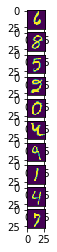

In [15]:
# Load MNIST Data
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)
train_data = mnist.train.images # Returns np.array
train_labels = np.asarray(mnist.train.labels, dtype=np.int32)
eval_data = mnist.test.images # Returns np.array
eval_labels = np.asarray(mnist.test.labels, dtype=np.int32)
print(train_data.shape)
print(train_labels.shape)
print(eval_data.shape)
print(eval_labels.shape)
# Randomly choose 10 images from first 50 images of Train Data.
for index,idx in enumerate(random.sample(range(50),10)): 
    plt.subplot(10,1,index+1)
    plt.imshow(train_data[idx].reshape(28,28))

Fill in the following snippet as per the instructions. 
* For initialising placeholders, use None to accommodate variable batch_size. 
* Do not change the seed; use it for comparing epoch-wise loss with your friends.
* You can use the following <a href ="https://www.tensorflow.org/versions/r1.1/get_started/mnist/beginners">tutorial</a> for reference. Note that they use softmax in their example, while you are required to code Feedforward neural network. 


In [23]:
def initializer_1(shape):
    # Do not change the seed. 
    np.random.seed(1)
    return np.random.randn(*shape)

def initializer_2(shape):
    # Do not change the seed.
    np.random.seed(1)
    return 0.01 * np.random.randn(*shape)

class MNIST_ANN:
    def __init__(self,hidden_units,activations,initializer):
        """
        Initialise the weights and build the compute graph. Use AdamOptimizer with default parameters.
        :param hidden_units - list of number of hidden units. 
               Eg: [10,20] => Layer 1 has 10 hidden units and Layer 2 has 20.
        :param activations - list of activations for each of the hidden layers.
               Eg: [tf.nn.sigmoid, tf.nn.tanh]
        :param intializer - the reference to the function used for intializing the weights
        """
        # Random variables
        num_inputs = 784
        num_outputs = 10
        
        # Define the placeholders
        self.input = tf.placeholder(tf.float64, [None,num_inputs], name="input")
        self.expected_output = tf.placeholder(tf.int32, [None,num_outputs], name="expected_output")
        
        # Initialise the weights and biases. Use zeros for the biases. 
        weights = []
        biases = []
        
        # Loop here.
        # For each hidden layer, initialize all necessary weights
        prevnum = num_inputs 
        h_layer = 1 #the current hidden layer
        for num_units in hidden_units:
          weights.append(tf.Variable(initializer([prevnum,num_units]), name="weights"+str(h_layer)))
          biases.append(tf.Variable(tf.zeros([num_units]), name="biases"+str(h_layer)))
          prevnum = num_units
          h_layer += 1
        
        # Finally, initialize weights & biases of output from last hidden layer
        weights.append(tf.Variable(initializer([prevnum,num_outputs]),name="weights_out"))
        biases.append(tf.Variable(tf.zeros([num_outputs]),name="biases_out"))
        
        # Build the graph for computing output.
        activations.append(None) #append None so that we can zip the lists
        prevlayer = self.input
        for w,b,acti in zip(weights,biases,activations):
          if(acti is not None):
            # hidden layers
            currlayer = acti(tf.add(tf.matmul(prevlayer,w),tf.cast(b,tf.float64)))
            prevlayer = currlayer
          else:
            # output layer
            self.output = tf.add(tf.matmul(prevlayer,tf.cast(weights[-1],tf.float64)),tf.cast(biases[-1],tf.float64))
          
        #self.output = tf.add(tf.matmul(prevlayer,tf.cast(weights[-1],tf.float32)),biases[-1]) 
        
        # Define the loss and accuracy here. (Refer Tutorial)
        self.cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=self.expected_output, logits=self.output))
        
        correct_prediction = tf.equal(tf.argmax(self.output,1), tf.argmax(self.expected_output,1))
        self.accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float64))
        
        # Instantiate the optimizer
        optimizer = tf.train.AdamOptimizer()
        self.train_op = optimizer.minimize(self.cost)
        self.session = tf.Session()
        
        # Initialize all variables
        tf.global_variables_initializer().run()
    
    def train(self,train_data,train_labels,eval_data,eval_labels,batch_size,epochs=100):
        """
        Training code.
        """
        sess = self.session

        # Slice the data and labels into batches depending on the batch_size.
        batches = 55000/batch_size
        #print(batches)
        
        for epoch in range(epochs):
            cost_epoch = 0
            for batch in range(int(batches)):
                data_batch, label_batch = mnist.train.next_batch(batch_size)
                sess.run(tf.global_variables_initializer())
                #print(batch)
                # Forward Propagate, compute cost and backpropagate.
                cost,_ = sess.run([self.cost,self.train_op],feed_dict={self.input:data_batch,
                                                             self.expected_output:label_batch})
                cost_epoch += cost
            if epoch%10 == 0:
                print("Train accuracy: {}".format(self.compute_accuracy(train_data,train_labels)))        
                print("Test accuracy: {}".format(self.compute_accuracy(eval_data,eval_labels)))
            print("Epoch {}: {}".format(epoch,cost_epoch))
        print("Train accuracy: {}".format(self.compute_accuracy(train_data,train_labels)))
        print("Test accuracy: {}".format(self.compute_accuracy(eval_data,eval_labels)))

    def compute_accuracy(self,data,labels):
        """
        Fill in code to compute accuracy
        
        """
        #print(data.dtype)
        #print(labels.dtype)
        #dat = tf.placeholder(tf.float64, data, name="data")
        #lab = tf.placeholder(tf.float64, [None,num_inputs], name="input")
        return #sess.run(self.accuracy,feed_dict={x:data, y_:labels})

In [24]:
ann = MNIST_ANN([10],[tf.nn.sigmoid],initializer_1)
ann.train(train_data,train_labels,eval_data,eval_labels,batch_size=5500,epochs=3)

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.

Train accuracy: None
Test accuracy: None
Epoch 0: 36.4055966432347
Epoch 1: 36.40559664323469
Epoch 2: 36.40559664323471
Train accuracy: None
Test accuracy: None


The expected output for the above snippet is
<pre>
Train accuracy: 0.780763626099
Test accuracy: 0.791599988937
Epoch 0: 6768.86486949
Epoch 1: 3275.00310887
Epoch 2: 2590.16959983
Train accuracy: 0.873399972916
Test accuracy: 0.876900017262
</pre>
If you get any other output and you feel you are correct, you can proceed (However, I cannot think of any case where you can get a different output). 